# Micro Credit  defaulter Project

Data description : In this dataset, classes are ordered, but it was not balanced. Defaulters are less then the non defaulters
These are the name of Features from the dataset -:

label

msisdn

aon

daily_decr30

daily_decr90

rental30

rental90

last_rech_date_ma

last_rech_date_da

last_rech_amt_ma

cnt_ma_rech30

fr_ma_rech30

sumamnt_ma_rech30

medianamnt_ma_rech30

medianmarechprebal30

cnt_ma_rech90

fr_ma_rech90

sumamnt_ma_rech90

medianamnt_ma_rech90

medianmarechprebal90

cnt_da_rech30

fr_da_rech30

cnt_da_rech90

fr_da_rech90

cnt_loans30

amnt_loans30

maxamnt_loans30

medianamnt_loans30

cnt_loans90

amnt_loans90

maxamnt_loans90

medianamnt_loans90

payback30

payback90

pcircle

pdate


Importing the libraries 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')



In [3]:
#loading the data set 
df = pd.read_csv('Data file.csv')
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


EDA

In [4]:
#checking how may rows and columns present in dataset
df.shape

(209593, 37)

Observation: the dataset contains the 209594 rows and 38 columns 

In [5]:
#checking data types
df.dtypes

Unnamed: 0                int64
label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_

#### Observation: dataset contain only 3 object dtype and 12 variable contains the intger data type,22 float variable 

In [6]:
#pdate column is object dtype so we need to convert to Date type

df['pdate'] = pd.to_datetime(df['pdate'])

In [7]:
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


Observation: unamed column just contain only soloman number

In [8]:
len(pd.unique(df['msisdn']))

186243

Observation: We came to know that "Msisdn" have only 186243 unique values, remaining are duplicate values 

In [9]:
#to check is there any null values 
df.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

Observation: dataset contains the No Null values

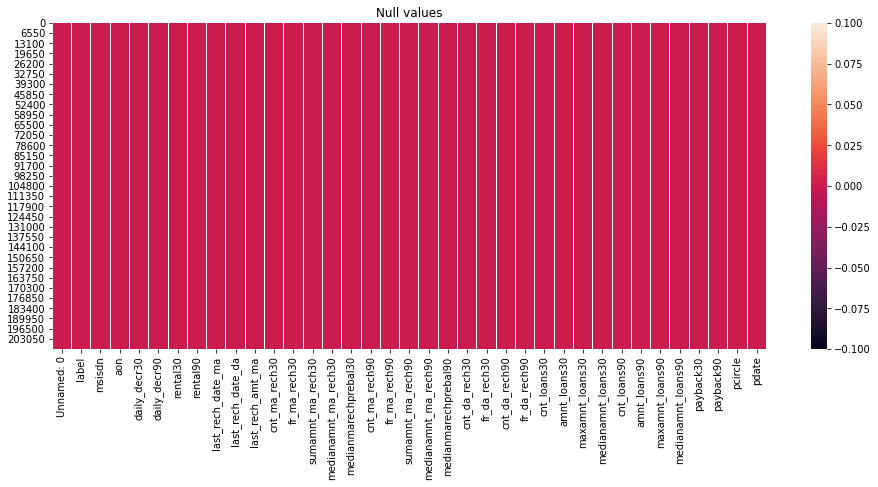

In [10]:
#Heat map to check the null values

plt.figure(figsize=[16,6])
sns.heatmap(df.isnull())
plt.title('Null values')
plt.show()

Observation: Data set not contains the null values 

In [11]:
#to check the classification in target variable
df['label'].value_counts()

1    183431
0     26162
Name: label, dtype: int64

Observation: the taget vaaiable have Two classifications "Zero" and "One"   Zero means defaulters and one mean NonDefaulters

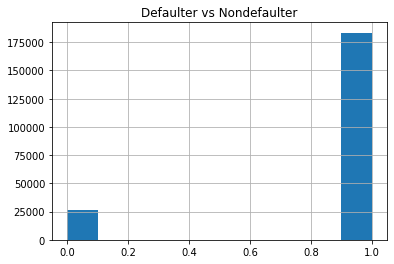

In [12]:
df['label'].hist(grid=True)
plt.title('Defaulter vs Nondefaulter')
plt.show()

Observation: Defaulter are the minority class the data so need to treat

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


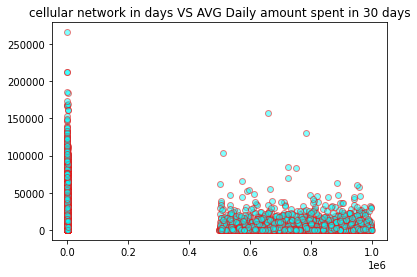

In [13]:
#Mutivaient analysis
plt.scatter(df['aon'], df['daily_decr30'], alpha=0.5, c=(0,1,1),edgecolors='r')
plt.title('cellular network in days VS AVG Daily amount spent in 30 days')
plt.show()

Observation : we cant see there is much relation between Avg on network and recharge amount in data

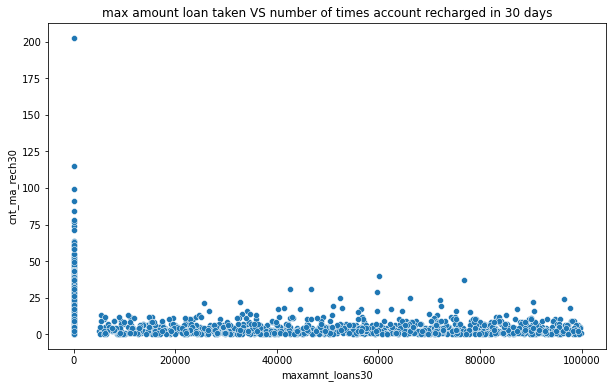

In [14]:
plt.figure(figsize=[10,6])
plt.title('max amount loan taken VS number of times account recharged in 30 days')
sns.scatterplot(df['maxamnt_loans30'],df['cnt_ma_rech30'])

Observation:

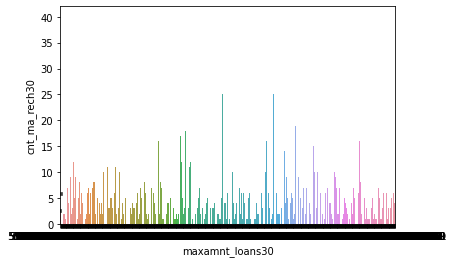

In [15]:
sns.barplot(x = 'maxamnt_loans30',
            y = 'cnt_ma_rech30',   
            data = df)


In [16]:
df['maxamnt_loans30'].max()

99864.56086393449

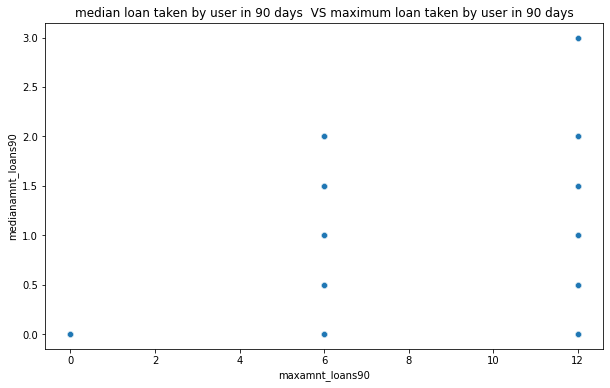

In [17]:
plt.figure(figsize=[10,6])

plt.title('median loan taken by user in 90 days  VS maximum loan taken by user in 90 days')
sns.scatterplot(df['maxamnt_loans90'],df['medianamnt_loans90']);

#check the correlation 

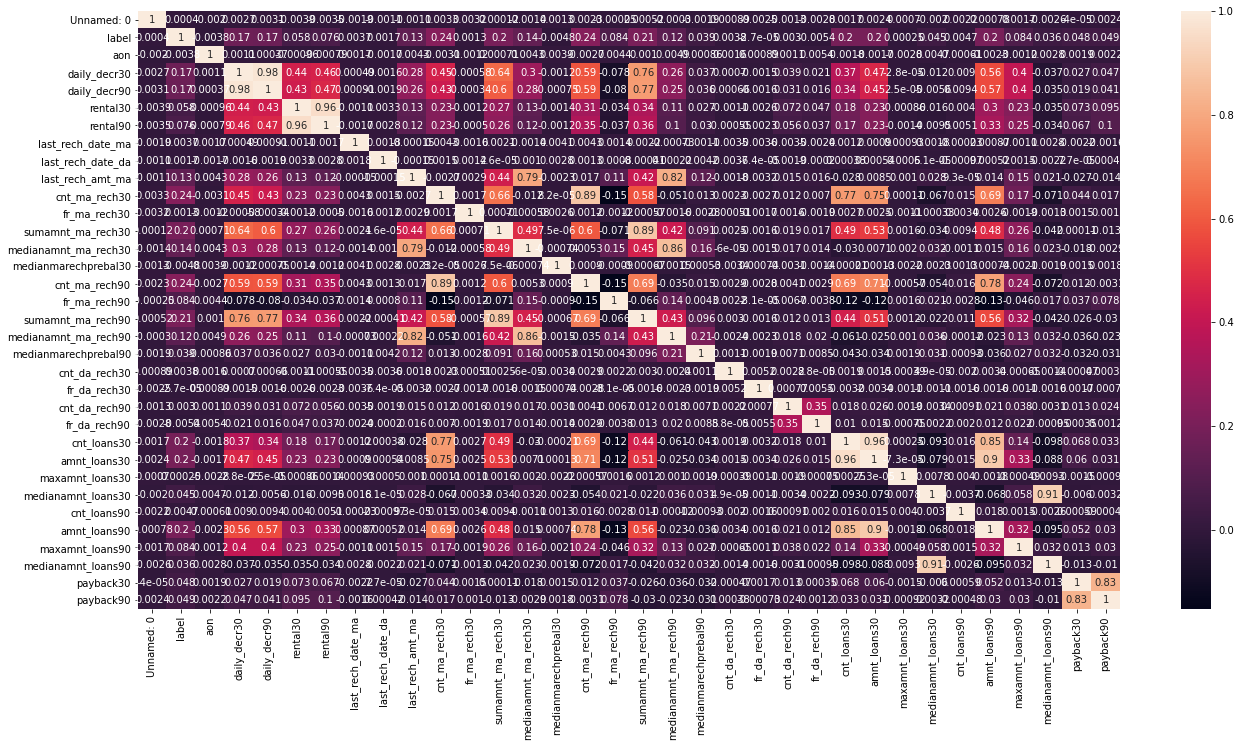

In [18]:
#To check the corr_mat  Heatmap
corr_hmap=df.corr()
plt.figure(figsize=(22,11))
sns.heatmap(corr_hmap, annot=True)
plt.show()




Observation: "msisdn" and "Pcircle" is not reflecting in correation heat map due to data type is object




In [19]:
#Co relation on target variable 
corr_matrix=df.corr()
corr_matrix['label'].sort_values(ascending = False)


label                   1.000000
cnt_ma_rech30           0.237331
cnt_ma_rech90           0.236392
sumamnt_ma_rech90       0.205793
sumamnt_ma_rech30       0.202828
amnt_loans90            0.199788
amnt_loans30            0.197272
cnt_loans30             0.196283
daily_decr30            0.168298
daily_decr90            0.166150
medianamnt_ma_rech30    0.141490
last_rech_amt_ma        0.131804
medianamnt_ma_rech90    0.120855
fr_ma_rech90            0.084385
maxamnt_loans90         0.084144
rental90                0.075521
rental30                0.058085
payback90               0.049183
payback30               0.048336
medianamnt_loans30      0.044589
medianmarechprebal90    0.039300
medianamnt_loans90      0.035747
cnt_loans90             0.004733
cnt_da_rech30           0.003827
last_rech_date_ma       0.003728
cnt_da_rech90           0.002999
last_rech_date_da       0.001711
fr_ma_rech30            0.001330
Unnamed: 0              0.000403
maxamnt_loans30         0.000248
fr_da_rech

Observation: 8 variables co-relation with target variable is alomost zero (0.001)

In [20]:
#label encoding 
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
df['msisdn'] = le.fit_transform(df['msisdn'])



In [21]:
#Droping the column "Pcircle " and unnamed columns 
#removing the un named column that contains only solman number 

df=df.drop(['Unnamed: 0'], axis=1)
df=df.drop(['pcircle'], axis=1)

In [22]:
#Separating the pdate and msisdn column

df1 =df.drop(['pdate','msisdn'],axis=1)

In [23]:
df1.head()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333


Observation: Two columns Msisdn and pdate columns removed from the data set , we will merge the these two column further  

Check the Data distribution among all other columns

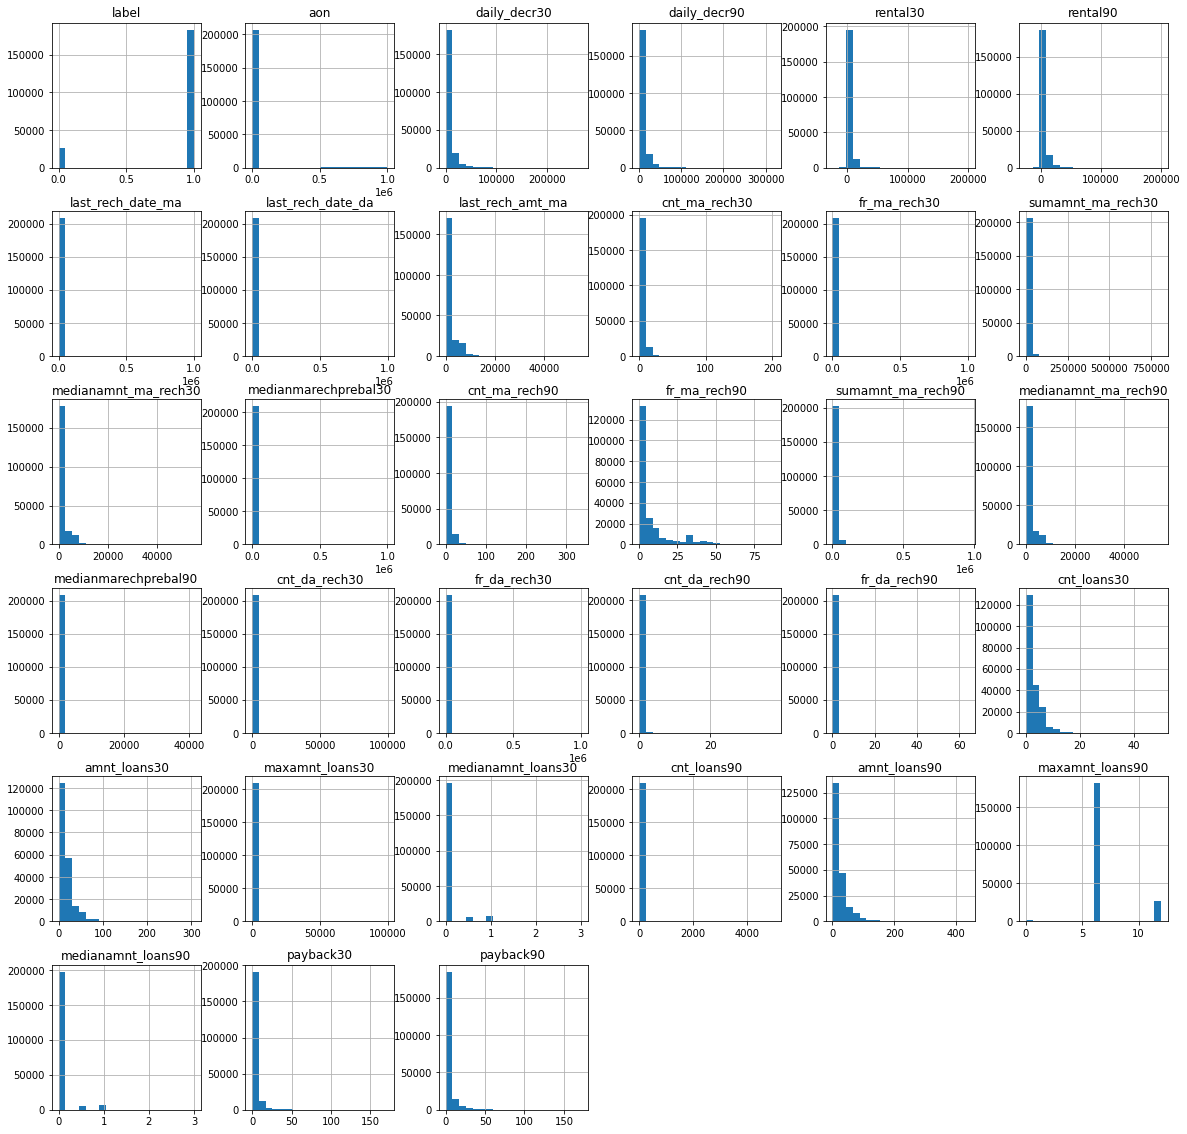

In [24]:
#plot histogram
df1.hist(bins=20,figsize=(20,20))
plt.show()

In [25]:
#Observation: Data is not distributed properly Righ skewed and left skewed 

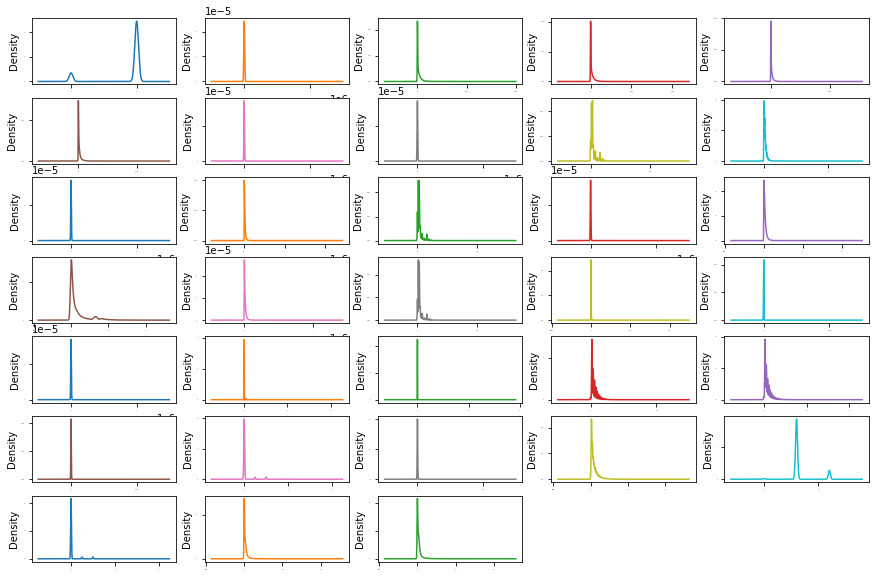

In [26]:
df1.plot(kind ='density', subplots = True, layout=(7,5), sharex=False, legend=False, fontsize=1, figsize=(15,10))
plt.show()

Observation: most of the variables data is not distributes normaly  data is skiwed

In [27]:
#Spliting the independent and target variables in  x and y 
x =df.drop(['label','pdate'], axis=1)
y = df['label']

We have splited the data into x and y datasets

In [28]:
#checking skeweness
#anyvalues between +0.5 to -0.5 skewness is acceptabel  reamining need to treatt
# log, sqrt, cfrt, box cox, power_tranform
#no need to correct the skewness for categorical columns 
x.skew()


msisdn                   0.000719
aon                     10.392949
daily_decr30             3.946230
daily_decr90             4.252565
rental30                 4.521929
rental90                 4.437681
last_rech_date_ma       14.790974
last_rech_date_da       14.814857
last_rech_amt_ma         3.781149
cnt_ma_rech30            3.283842
fr_ma_rech30            14.772833
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
medianmarechprebal30    14.779875
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
sumamnt_ma_rech90        4.897950
medianamnt_ma_rech90     3.752706
medianmarechprebal90    44.880503
cnt_da_rech30           17.818364
fr_da_rech30            14.776430
cnt_da_rech90           27.267278
fr_da_rech90            28.988083
cnt_loans30              2.713421
amnt_loans30             2.975719
maxamnt_loans30         17.658052
medianamnt_loans30       4.551043
cnt_loans90             16.594408
amnt_loans90             3.150006
maxamnt_loans9

We can see the skewness  in the dataset, we will remove the skewness using power transform function

In [29]:
#seprating the categoricall variable form 
#x_df= x.drop(['msisdn','pdate'], axis=1)

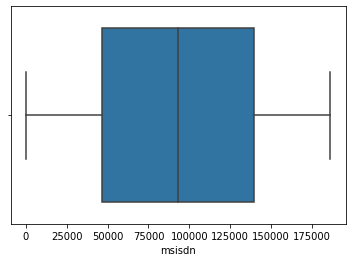

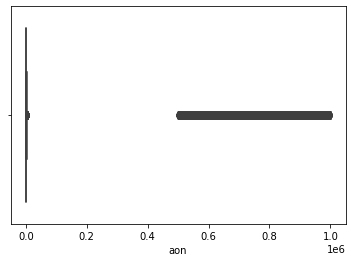

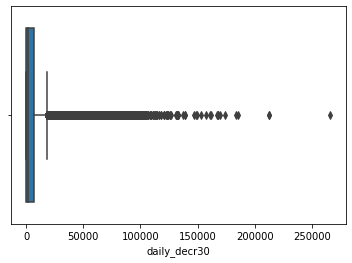

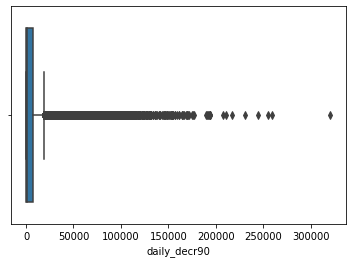

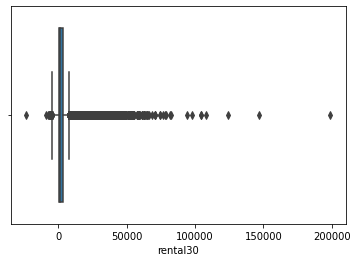

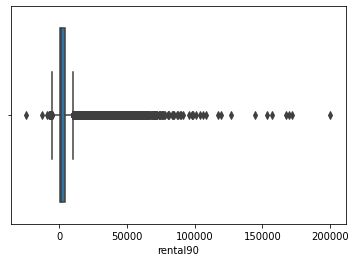

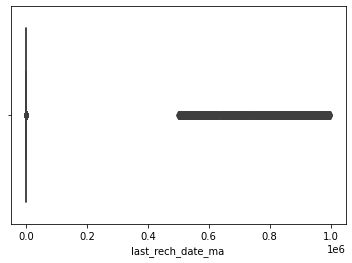

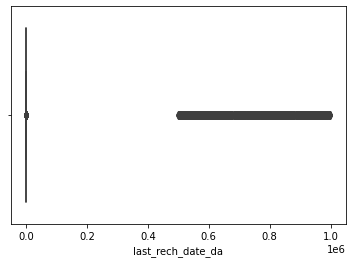

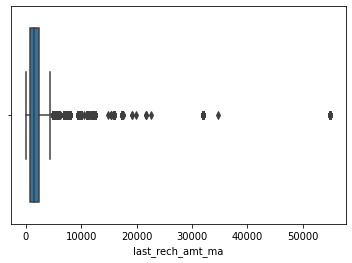

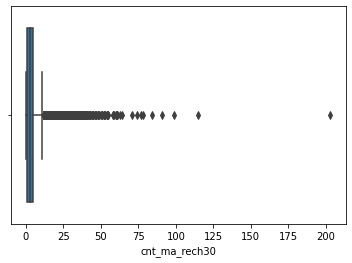

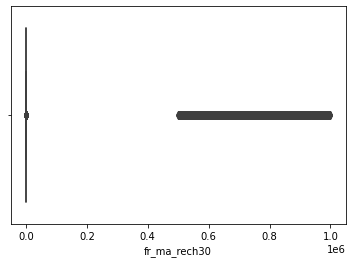

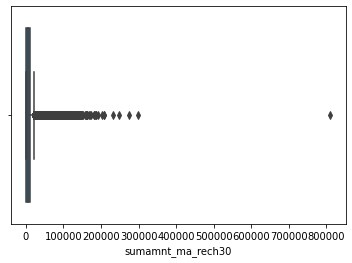

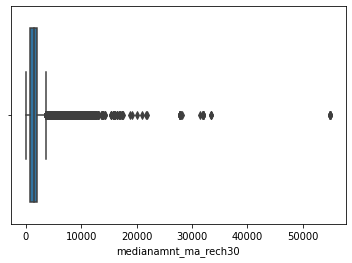

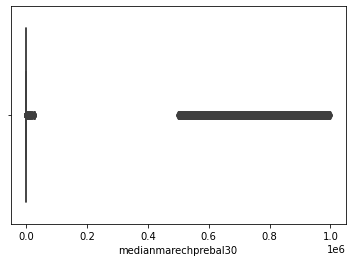

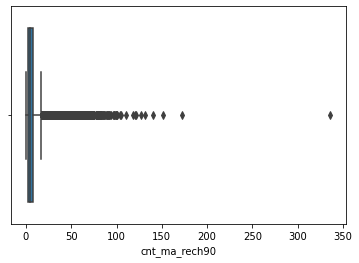

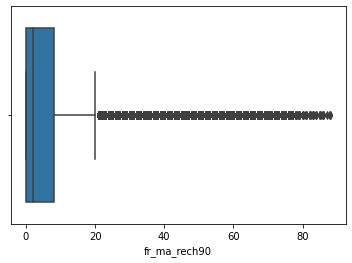

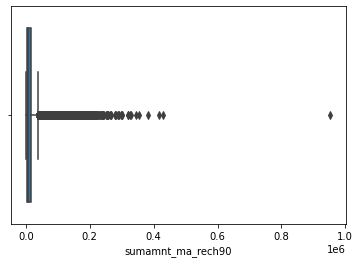

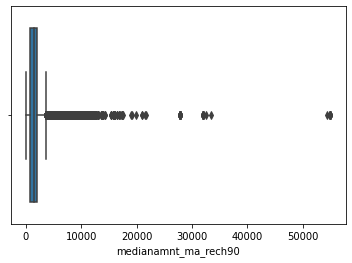

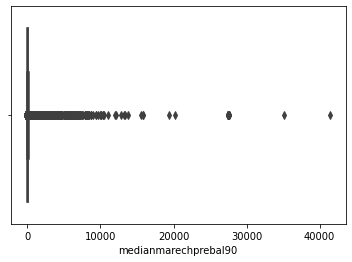

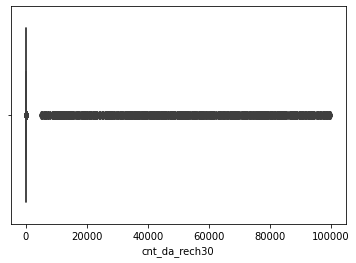

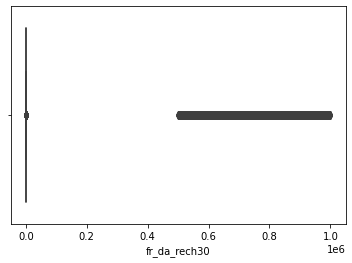

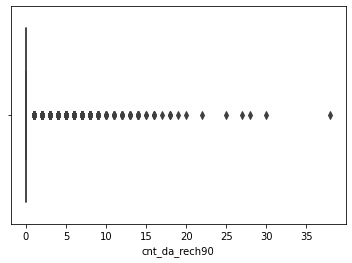

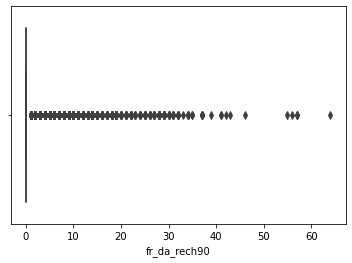

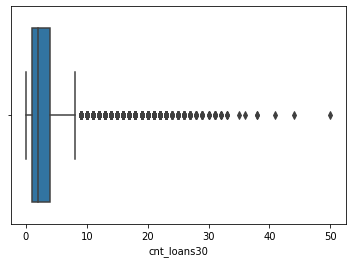

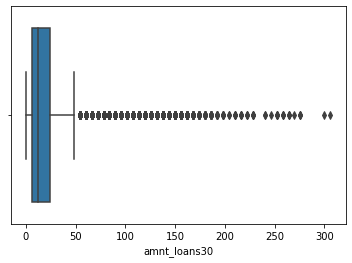

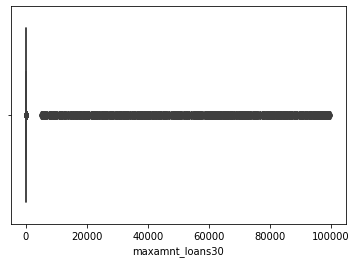

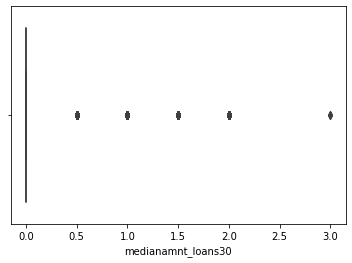

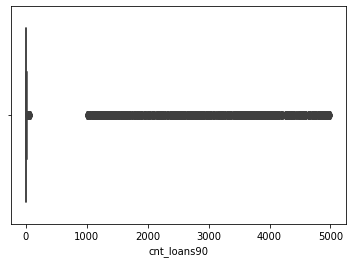

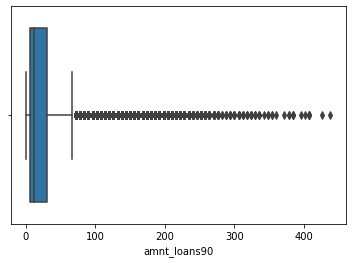

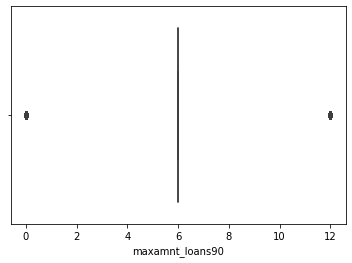

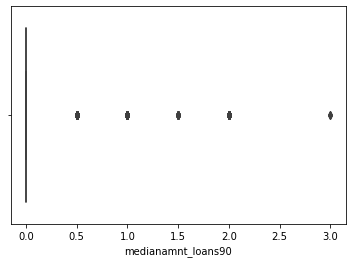

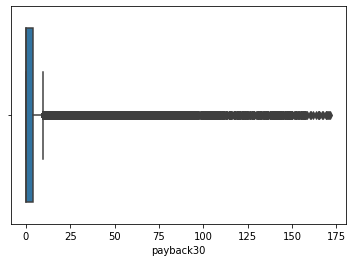

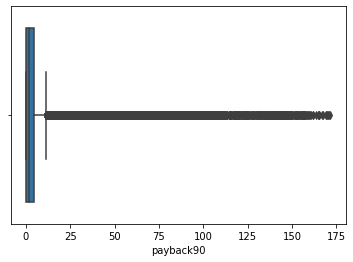

In [30]:
#box plot 

for i in x:
    plt.figure()
    sns.boxplot(x[i])
plt.show()

Observation: Most of the column have outliers need to treat them 

# Spliting the data into training set and test set

In [31]:
# creating train test splits
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=40)

### Normalizing the data using minmax scaler

In [32]:
# import libraries
#NOrmalizing the data using minmax scaler
  
from sklearn.preprocessing import MinMaxScaler
# creating scaler scale var.
norm = MinMaxScaler()
# fit the scal
norm_fit = norm.fit(x_train)
# transfromation of trainig data
scal_xtrain = norm_fit.transform(x_train)
# transformation of testing data
scal_xtest = norm_fit.transform(x_test)
print(scal_xtrain)

[[8.32089432e-02 1.02409344e-03 3.66755014e-02 ... 0.00000000e+00
  1.36054422e-02 1.36054422e-02]
 [1.28880704e-01 2.88026281e-04 3.91686289e-04 ... 0.00000000e+00
  3.88726919e-02 3.88726919e-02]
 [9.99033516e-01 4.61042068e-04 3.66688076e-04 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [5.45231473e-01 2.65024182e-04 3.80722161e-04 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [4.29043932e-01 1.04009490e-04 4.00812204e-04 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [7.47049538e-01 1.29611826e-03 1.25029134e-02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


In [33]:
scal_xtrain.shape

(167674, 33)

In [34]:
x.shape

(209593, 33)


Observation: after normalizing the data we have 167674 rows and 33 columns 

## Zscore

In [35]:
"""#we alreday used min max scaler
#to detect and remove outlers using Zscore 

from scipy import stats
import numpy as np
z = np.abs(stats.zscore(x))
print(z)
"""

'#we alreday used min max scaler\n#to detect and remove outlers using Zscore \n\nfrom scipy import stats\nimport numpy as np\nz = np.abs(stats.zscore(x))\nprint(z)\n'

In [36]:
"""#Let’s try and define a threshold to identify an outlier.

threshold = 3
print(np.where(z > 3))"""


'#Let’s try and define a threshold to identify an outlier.\n\nthreshold = 3\nprint(np.where(z > 3))'

In [37]:
#print(z[1][1])



In [38]:
"""#IQR score -

Q1 = x.quantile(0.25)
Q3 = x.quantile(0.75)
IQR = Q3 - Q1
print(IQR)


#lower limit=Q1−(IQR×multiplier)

#upper limit=Q3+(IQR×multiplier)"""

'#IQR score -\n\nQ1 = x.quantile(0.25)\nQ3 = x.quantile(0.75)\nIQR = Q3 - Q1\nprint(IQR)\n\n\n#lower limit=Q1−(IQR×multiplier)\n\n#upper limit=Q3+(IQR×multiplier)'

In [39]:
#print(x_df < (Q1 - 1.5 * IQR)) |(x_df > (Q3 + 1.5 * IQR))

In [40]:
#df_o = x[(z < 3).all(axis=1)]

In [41]:
#df_o.shape

#### df.shape

Observation: after removing the outliers from the dataset we have rows: 161465,  columns:32 we have lost 48128 rows 
we are lossing 22.96 % rows from data set

In [42]:
"""#box plot 

for i in df_o:
    plt.figure()
    sns.boxplot(df_o[i])
plt.show()"""

'#box plot \n\nfor i in df_o:\n    plt.figure()\n    sns.boxplot(df_o[i])\nplt.show()'

Observation: still some outliers data we can see 

In [43]:
x.skew()

msisdn                   0.000719
aon                     10.392949
daily_decr30             3.946230
daily_decr90             4.252565
rental30                 4.521929
rental90                 4.437681
last_rech_date_ma       14.790974
last_rech_date_da       14.814857
last_rech_amt_ma         3.781149
cnt_ma_rech30            3.283842
fr_ma_rech30            14.772833
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
medianmarechprebal30    14.779875
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
sumamnt_ma_rech90        4.897950
medianamnt_ma_rech90     3.752706
medianmarechprebal90    44.880503
cnt_da_rech30           17.818364
fr_da_rech30            14.776430
cnt_da_rech90           27.267278
fr_da_rech90            28.988083
cnt_loans30              2.713421
amnt_loans30             2.975719
maxamnt_loans30         17.658052
medianamnt_loans30       4.551043
cnt_loans90             16.594408
amnt_loans90             3.150006
maxamnt_loans9

In [44]:
for i in x.columns:
    if x[i].skew()>0.5 :
        x[i]=np.cbrt(x[i])
    if x[i].skew()<-0.5:
        x[i]=np.cbrt(x[i])
x.skew()

msisdn                   0.000719
aon                      8.740118
daily_decr30             0.538116
daily_decr90             0.607607
rental30                 0.084165
rental90                 0.173289
last_rech_date_ma       13.755535
last_rech_date_da       14.001042
last_rech_amt_ma        -0.401954
cnt_ma_rech30           -1.894286
fr_ma_rech30            13.695845
sumamnt_ma_rech30       -0.213060
medianamnt_ma_rech30    -1.944025
medianmarechprebal30    11.578252
cnt_ma_rech90           -0.338958
fr_ma_rech90             0.362360
sumamnt_ma_rech90       -0.016530
medianamnt_ma_rech90    -2.348905
medianmarechprebal90     0.509085
cnt_da_rech30           14.792314
fr_da_rech30            14.127590
cnt_da_rech90            6.670255
fr_da_rech90            17.539627
cnt_loans30              0.269101
amnt_loans30             0.345374
maxamnt_loans30         14.597061
medianamnt_loans30       3.558178
cnt_loans90             10.411644
amnt_loans90             0.747726
maxamnt_loans9

### After apply CBRT method to normalize the data set we got 15 column below 0.5 

In [45]:
x.head()

,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,40191,6.479224,14.510179,14.526152,6.038000,6.383568,1.259921,0.0,11.545503,1.080060,2.758924,14.546423,2.260152,1.957434,1.259921,2.758924,14.546423,2.260152,1.957434,0.0,0.0,0.0,0.0,1.259921,2.289428,1.817121,0.0,1.259921,2.289428,1.220285,0.0,3.072317,3.072317
1,142291,8.929490,22.971610,22.973347,15.454616,15.454616,2.714418,0.0,17.953584,1.000000,0.000000,17.953584,2.618487,3.937357,1.000000,0.000000,17.953584,2.618487,3.937357,0.0,0.0,0.0,0.0,1.000000,2.289428,2.289428,0.0,1.000000,2.289428,1.317981,0.0,0.000000,0.000000
2,33594,8.118041,11.181560,11.181560,9.655359,9.655359,1.442250,0.0,11.545503,1.000000,0.000000,11.545503,2.260152,4.047761,1.000000,0.000000,11.545503,2.260152,4.047761,0.0,0.0,0.0,0.0,1.000000,1.817121,1.817121,0.0,1.000000,1.817121,1.220285,0.0,0.000000,0.000000
3,104157,6.223084,2.768873,2.768873,5.422267,5.422267,3.448217,0.0,9.820117,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,9.820117,2.141438,1.357209,0.0,0.0,0.0,0.0,1.259921,2.289428,1.817121,0.0,1.259921,2.289428,1.220285,0.0,0.000000,0.000000
4,6910,9.820117,5.320595,5.320595,10.319359,10.319359,1.587401,0.0,13.217256,1.241366,1.259921,27.157290,2.364361,3.072317,2.000000,1.259921,28.641646,2.423878,3.271066,0.0,0.0,0.0,0.0,1.912931,3.476027,1.817121,0.0,1.912931,3.476027,1.220285,0.0,1.326352,1.326352


In [46]:
x.tail()

,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
209588,42866,7.392542,5.335309,5.335309,10.288875,10.288875,1.000000,0.000000,15.937254,1.129831,1.259921,21.830656,2.449786,4.511248,1.442250,1.259921,21.830656,2.449786,4.511248,0.0,0.0,0.0,0.0,1.259921,2.289428,1.817121,0.0,1.259921,2.289428,1.220285,0.0,1.000000,1.00000
209589,178248,10.243998,3.330299,3.330299,12.000833,12.000833,1.587401,0.000000,9.177544,1.166529,1.000000,14.568444,2.093673,5.443499,1.817121,1.259921,15.924120,2.093673,4.817414,0.0,0.0,0.0,0.0,1.442250,2.620741,1.817121,0.0,1.442250,2.620741,1.220285,0.0,1.000000,1.00000
209590,53995,10.043147,22.794073,22.833294,18.030637,20.718232,1.442250,0.000000,11.545503,1.195813,2.000000,21.055033,2.260152,3.711578,2.223980,1.709976,26.491631,2.260152,3.612150,0.0,0.0,0.0,0.0,1.587401,3.476027,2.289428,0.0,1.817121,3.779763,1.317981,0.0,1.587401,1.56504
209591,111388,12.009252,23.200657,23.253879,7.439995,9.948334,1.259921,3.361975,9.177544,1.195813,1.587401,22.991806,2.093673,5.473704,1.817121,1.587401,26.178749,2.375690,4.641589,0.0,0.0,1.0,0.0,1.259921,2.620741,2.289428,0.0,1.442250,2.884499,1.317981,0.0,0.000000,2.18976
209592,121263,11.649590,16.496616,16.552110,7.850992,8.578058,2.351335,0.000000,19.596931,1.080060,1.000000,20.850794,2.548354,7.091983,1.442250,2.668402,25.504933,2.696059,7.319856,0.0,0.0,0.0,0.0,1.259921,2.620741,2.289428,0.0,1.259921,2.620741,1.317981,0.0,0.000000,0.00000


In [47]:
x.isnull().sum()

msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
dtype: int64

Observation: there is null values in dataset

#Handling classs imbalanced problem by oversampling the minority classs

In [48]:
#import library
from collections import Counter
from imblearn.over_sampling import SMOTE
counter = Counter(y_train)
print('Before', counter)

smote = SMOTE()

x_smote, y_smote = smote.fit_resample(x,y)

counter =Counter(y_smote)
print('after', counter)

Before Counter({1: 146734, 0: 20940})
after Counter({0: 183431, 1: 183431})


# logistic regression

In [49]:
#logistic regression 
#Model building
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(x_train,y_train)

#lg.fit(x_smote,y_smote) #After oversampling the data

pred =lg.predict(x_test)
print(pred)

[1 1 1 ... 1 1 1]


In [82]:
print("accuracy_score", accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy_score 0.8626637085808345
[[  439  4783]
 [  974 35723]]
              precision    recall  f1-score   support

           0       0.31      0.08      0.13      5222
           1       0.88      0.97      0.93     36697

    accuracy                           0.86     41919
   macro avg       0.60      0.53      0.53     41919
weighted avg       0.81      0.86      0.83     41919



Observation:

1. we getting the logisctic classification accuracy is 0.87%
2. after oversampling the data we geting theaccuracy is 77%

### DecisionTree model 

In [72]:
#decision Tree model 
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
#dt.fit(x_smote,y_smote) After balancing the data
p=dt.predict(x_test)
print(accuracy_score(y_test,p))


0.8662897492783702


Observation:

1. we getting the logisctic classification accuracy is 0.86%
2. after oversampling the data we geting theaccuracy is 57%

In [73]:
#AUC ROC CURVE
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score


In [74]:
y_pred_prob =lg.predict_proba(x_test)[:,1]
y_pred_prob

array([0.98311431, 0.97114084, 0.72913345, ..., 0.8479447 , 0.9956865 ,
       0.68887127])

In [54]:
fpr,tpr,thresholds =roc_curve(y_test,y_pred_prob)


In [55]:
thresholds

array([2.        , 1.        , 1.        , ..., 0.2789328 , 0.23721597,
       0.21166686])

In [56]:
tpr

array([0.        , 0.00117176, 0.00128076, ..., 0.9999455 , 1.        ,
       1.        ])

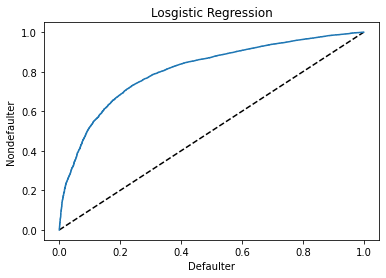

In [57]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('Defaulter')
plt.ylabel('Nondefaulter ')
plt.title('Losgistic Regression')
plt.show()


In [75]:
auc_score=roc_auc_score(y_test,lg.predict(x_test))

In [76]:
print(auc_score)

0.5126993058467029


In [77]:
#cross validation
from sklearn.model_selection import cross_val_score
score=cross_val_score(dt, x,y, cv=5)
print(score)
print(score.mean())


[0.86399962 0.86359407 0.86464372 0.86640584 0.86757479]
0.8652436078180722


Observation: Cross validation Of score of the model is 86%

In [61]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (score.mean(), score.std()))

0.87 accuracy with a standard deviation of 0.00


### RandomForest

In [62]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=100)
rf.fit(x_smote, y_smote)
pred=rf.predict(x_test)
print('accuracy score', pred)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy score [1 1 1 ... 1 1 1]
0.8626637085808345
[[  439  4783]
 [  974 35723]]
              precision    recall  f1-score   support

           0       0.31      0.08      0.13      5222
           1       0.88      0.97      0.93     36697

    accuracy                           0.86     41919
   macro avg       0.60      0.53      0.53     41919
weighted avg       0.81      0.86      0.83     41919




                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      `Random forest model accuracy we are getting 99% 

Observaation: Random forest model accuracy we getting 86% 

In [67]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, pred)
print(cm)
accuracy_score(y_test, pred)

[[  439  4783]
 [  974 35723]]


0.8626637085808345

Observation: Confusion matrix accuracy also getting 86%

### SVM model

In [69]:
#importing the svm model
from sklearn.svm import LinearSVC

clf = LinearSVC(random_state=0, tol=1e-5)

clf.fit(x_train, y_train.ravel()) 

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=0, tol=1e-05,
          verbose=0)

##### Making Predictions

In [83]:
Y_pred = clf.predict(x_test)
print("accuracy_score", accuracy_score(y_test,Y_pred))

accuracy_score 0.8711801331138624


In [81]:
# Evaluating the Algorithm

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,Y_pred))

[[  320  4902]
 [  498 36199]]
              precision    recall  f1-score   support

           0       0.39      0.06      0.11      5222
           1       0.88      0.99      0.93     36697

    accuracy                           0.87     41919
   macro avg       0.64      0.52      0.52     41919
weighted avg       0.82      0.87      0.83     41919



We getting highest accuracy in linear SVC model so we are saving the model  

In [84]:
from sklearn.externals import joblib
  
# Save the model as a pickle in a file
joblib.dump(clf, 'SVC.pkl')
  
# Load the model from the file
#SVC_joblib = joblib.load('SVC.pkl') 
  
# Use the loaded model to make predictions
#SVC.predict(x_test)


['SVC.pkl']